### Assignment_4

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
# Read the data from the CSV file
data = pd.read_csv('C:\\Users\\Bindu\\Documents\\Arcada\\Visual_Analytics\\Assainments\\Ass4\\Data Transfer requests permitted or Denied.csv.csv')

# Replace data types with abbreviations
data['Type of Data'] = data['Type of Data'].replace({'Personal': 'P', 'Commercial': 'C', 'Technical': 'T'},regex=True)



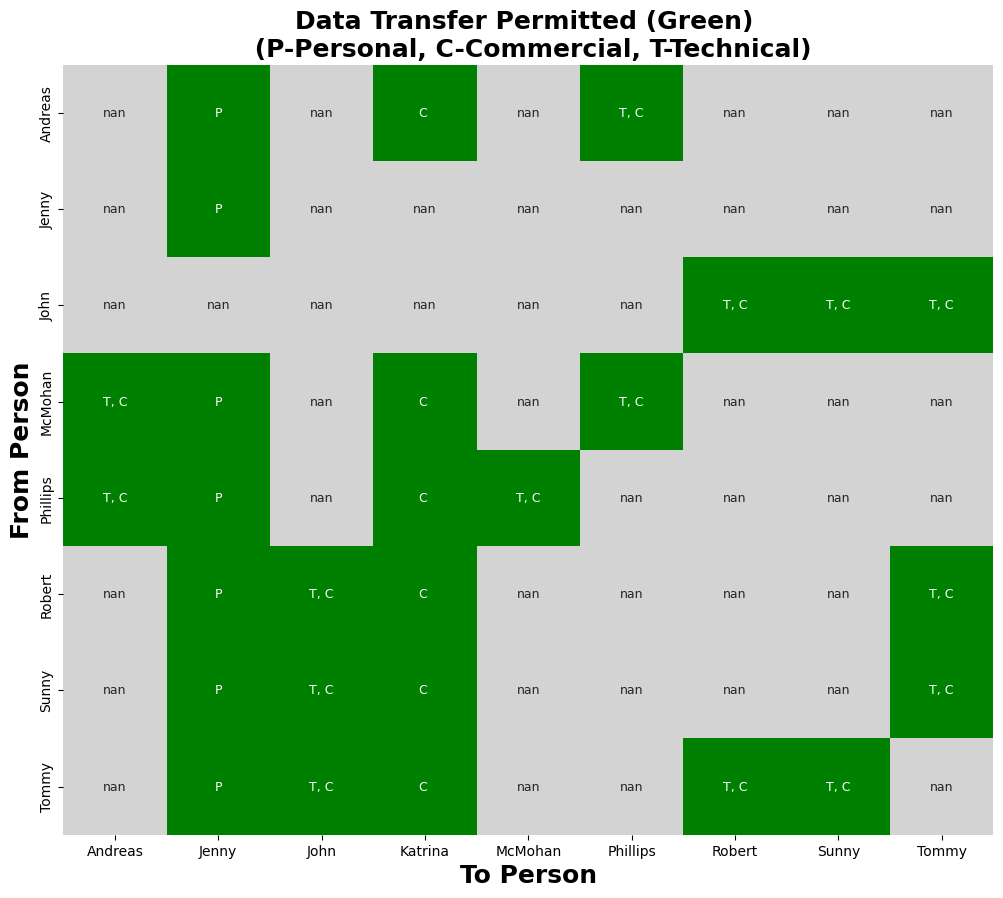

<Figure size 640x480 with 0 Axes>

In [38]:
data_yes = data[data['Permitted or not'] == 'Yes']

# Create a pivot table to identify available data and data type
pivot_table = pd.pivot_table(data_yes, index='From Person', columns='To Person', values=['Permitted or not', 'Type of Data'], aggfunc=lambda x: ', '.join(str(v) for v in x))

# Extract the availability of data (masking NaN values)
availability_mask = pivot_table['Permitted or not'].isnull()
 
# Map colors for 'Permitted or not' column
color_map = {'Yes': 'green'}

# Mapping the colors for the heatmap
mapped_colors = pivot_table['Permitted or not'].applymap(lambda x: color_map.get(x, 'white'))

# Create a custom colormap with specified colors
cmap = sns.color_palette(['green', 'blue', 'lightgrey'])  #gray for 'NaN', red for 'No', Green for 'Yes'

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(availability_mask, cmap=cmap, cbar=False, annot=pivot_table['Type of Data'], fmt='', annot_kws={"size": 9})
plt.title('Data Transfer Permitted (Green) \n (P-Personal, C-Commercial, T-Technical)',fontsize=18,fontweight='bold')
plt.xlabel('To Person',fontsize=18,fontweight='bold')
plt.ylabel('From Person',fontsize=18,fontweight='bold')
plt.show()
plt.savefig('Data_transfer_Permit.png',dpi=600)

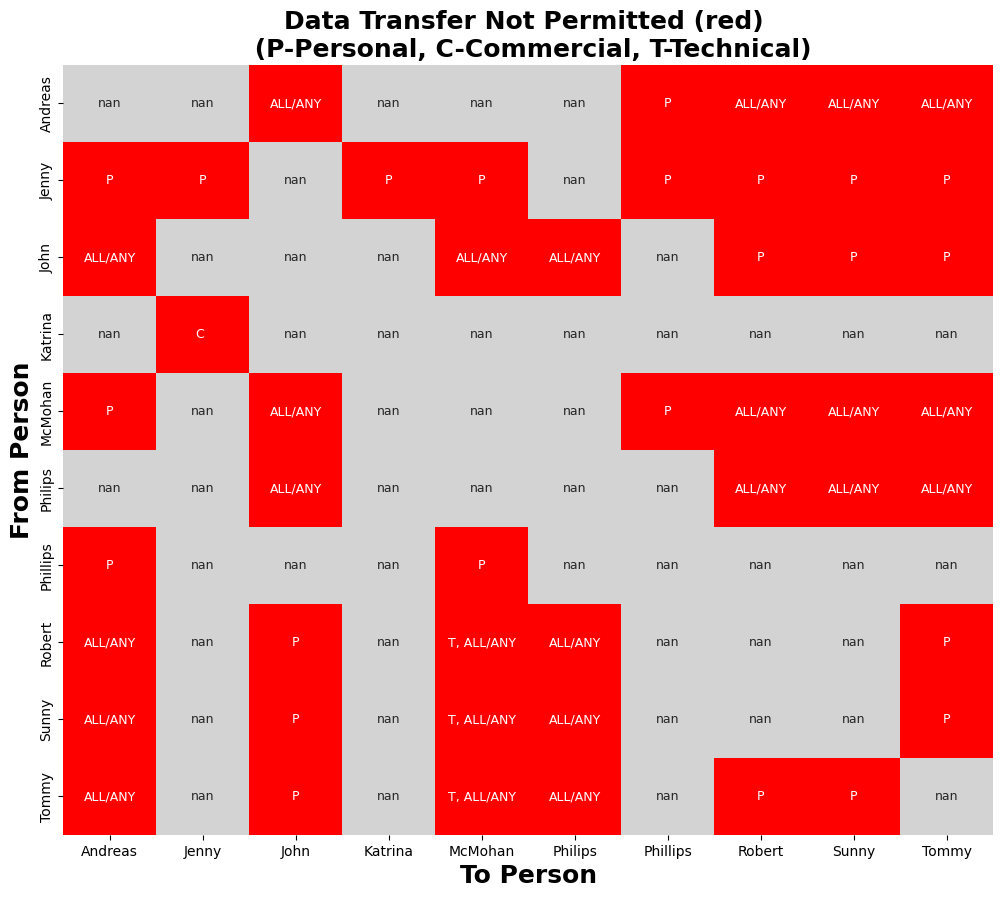

<Figure size 640x480 with 0 Axes>

In [39]:
data_no = data[data['Permitted or not'] == 'No']

# Create a pivot table to identify available data and data type
pivot_table = pd.pivot_table(data_no, index='From Person', columns='To Person', values=['Permitted or not', 'Type of Data'], aggfunc=lambda x: ', '.join(str(v) for v in x))

# Extract the availability of data (masking NaN values)
availability_mask = pivot_table['Permitted or not'].isnull()
 
# Map colors for 'Permitted or not' column
color_map = {'No': 'red'}

# Mapping the colors for the heatmap
mapped_colors = pivot_table['Permitted or not'].applymap(lambda x: color_map.get(x, 'white'))

# Create a custom colormap with specified colors
cmap = sns.color_palette(['red', 'blue', 'lightgrey'])  #gray for 'NaN', red for 'No', Green for 'Yes'
        
# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(availability_mask, cmap=cmap, cbar=False, annot=pivot_table['Type of Data'], fmt='', annot_kws={"size": 9})
plt.title('Data Transfer Not Permitted (red) \n (P-Personal, C-Commercial, T-Technical)',fontsize=18,fontweight='bold')
plt.xlabel('To Person',fontsize=18,fontweight='bold')
plt.ylabel('From Person',fontsize=18,fontweight='bold')
plt.show()
plt.savefig('Data_transfer_Permit.png',dpi=600)

### Conclution:
The heat map visualisation depicts permissions for data transfer across three classes—Commercial (C), Technical (T), and Personal (P)—within a research organization.

The data reveals selective and asymmetrical permissions among individuals for sharing different classes of data. While some individuals possess broader permissions to share various data types with specific colleagues, others have limited permissions for data exchange.Inconsistencies in permissions across different pairs suggest incomplete documentation. Comprehensive documentation and regular reviews are essential for maintaining data security and clarity in sharing protocols within the organization.

#### Specific Observations:

- Permissions for data transfer are quite selective. Not all individuals have permissions to exchange all types of data with each other. For instance, John seems to have limited or no permissions to exchange any kind of data with others.

- Andreas, Phillips, McMohan, Robert, Sunny, and Tommy seem to have broader permissions compared to others. They have permissions to share various types of data with specific individuals.

- There are many missing entries in the heatmap, indicating that the permissions for data transfer between various pairs of individuals are not fully documented. As mentioned in the assignment, Absence of data doesn't imply permission; it simply means that the specific permissions for those pairs are not specified in the provided information.